In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
%load_ext autoreload
%autoreload 2
from functions import loaddata, MACD, RSI

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


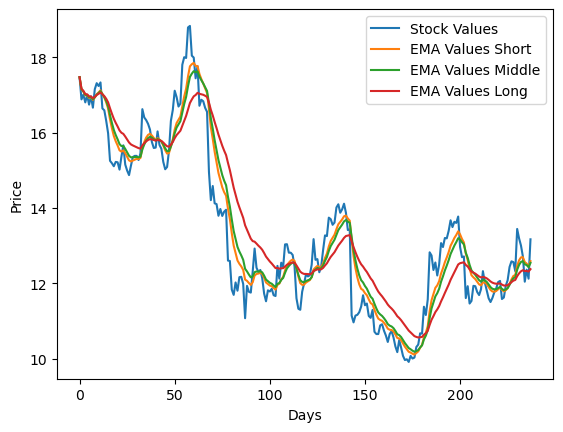

In [4]:
test = loaddata("mid_close", 20100104, 20110104).iloc[19].dropna().ewm(span=9, ignore_na=True).mean()
test1 = loaddata("mid_close", 20100104, 20110104).iloc[19].dropna().ewm(span=12, ignore_na=True).mean()
test2 = loaddata("mid_close", 20100104, 20110104).iloc[19].dropna().ewm(span=26, ignore_na=True).mean()
test3 = loaddata("mid_close", 20100104, 20110104).iloc[19].dropna()
leng = test1.size

plt.plot([i for i in range(leng)], test3, label="Stock Values")
plt.plot([i for i in range(leng)], test, label="EMA Values Short")
plt.plot([i for i in range(leng)], test1, label="EMA Values Middle")
plt.plot([i for i in range(leng)], test2, label="EMA Values Long")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


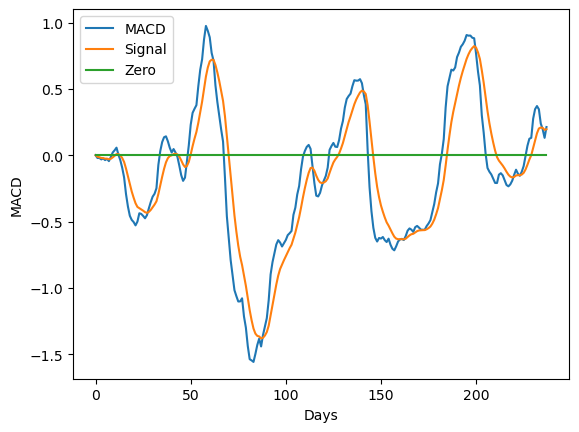

array([  0,   8,  12,  33,  42,  48,  67, 109, 113, 122, 143, 181, 205,
       226])

In [5]:
macd = test - test2
signal = macd.ewm(span=9, ignore_na=True).mean()
xzero = [0 for i in range(leng)]
temp = [i for i in range(leng)]

plt.plot(temp, macd, label="MACD")
plt.plot(temp, signal, label="Signal")
plt.plot(temp, xzero, label="Zero")
plt.xlabel("Days")
plt.ylabel("MACD")
plt.legend()
plt.show()
buys1 = np.argwhere(np.diff(np.sign(macd - signal))).flatten()
buys = np.argwhere(np.diff(np.sign(macd - xzero))).flatten()

buys


In [6]:
signal_buys = test3.iloc[buys1]
zero_buys = test3.iloc[buys]

sum = 0
sum1 = 0
#print(len(signal_buys))
for i in range(len(signal_buys)-1):
    #Short
    if macd.iloc[buys1[i] + 1] - signal.iloc[buys1[i] + 1] < 0:
        #print(i)    
        #print(signal_buys.iloc[i] - signal_buys.iloc[i+1])
        sum += signal_buys.iloc[i] - signal_buys.iloc[i+1]
        if i == len(signal_buys) - 2:
            #print("here1", test.iloc[-1] - signal_buys.iloc[i+1])
            sum += test3.iloc[-1] - signal_buys.iloc[i+1]
    #Long
    else:
        #print(i)
        #print(signal_buys.iloc[i+1] - signal_buys.iloc[i])
        sum += signal_buys.iloc[i+1] - signal_buys.iloc[i]
        if i == len(signal_buys) - 2:
            #print("here", signal_buys.iloc[i+1] - test.iloc[-1])
            sum += signal_buys.iloc[i+1] - test3.iloc[-1]

for i in range(len(zero_buys)-1):
    #Short
    if macd.iloc[buys[i] + 1] - xzero[buys[i] + 1] < 0:
        #print(i)    
        #print(zero_buys.iloc[i] - zero_buys.iloc[i+1])
        sum1 += zero_buys.iloc[i] - zero_buys.iloc[i+1]
        if i == len(zero_buys) - 2:
            #print("here1", test3.iloc[-1] - zero_buys.iloc[i+1])
            sum1 += test3.iloc[-1] - zero_buys.iloc[i+1]
    #Long
    else:
        #print(i)
        #print(signal_buys.iloc[i+1] - signal_buys.iloc[i])
        sum1 += zero_buys.iloc[i+1] - zero_buys.iloc[i]
        if i == len(zero_buys) - 2:
            #print("here", zero_buys.iloc[i+1] - test3.iloc[-1])
            sum1 += zero_buys.iloc[i+1] - test3.iloc[-1]


print("Traditional Signal: ", sum)
print("Zero Signal: ", sum1)

Traditional Signal:  23.674997329712003
Zero Signal:  -0.38500022888160146


In [75]:
total_signal = 0
total_zero = 0
full_data = loaddata("mid_close", 20190101, 20191231)
for i in range(4752):
    ema9 = full_data.iloc[i].dropna().ewm(span=9, ignore_na=True).mean()
    ema12 = full_data.iloc[i].dropna().ewm(span=12, ignore_na=True).mean()
    ema24 = full_data.iloc[i].dropna().ewm(span=26, ignore_na=True).mean()
    close_price = full_data.iloc[i].dropna()
    length = ema12.size
    macd12_24 = ema12 - ema24
    signal9 = macd12_24.ewm(span=9, ignore_na=True).mean()
    x_zero = [0 for i in range(length)]
    buy_signal_index = np.argwhere(np.diff(np.sign(macd12_24 - signal9))).flatten()
    buy_0_index = np.argwhere(np.diff(np.sign(macd12_24 - x_zero))).flatten()
    buy_signal = close_price.iloc[buy_signal_index+1] #Might need to add 1 to indexes here to make it fair
    buy_zero = close_price.iloc[buy_0_index+1] #Might need to add 1 to indexes here to make it fair

    sum_signal = 0
    sum_zero = 0
    for j in range(len(buy_signal)-1):
        #Short
        if macd12_24.iloc[buy_signal_index[j] + 1] - signal9.iloc[buy_signal_index[j] + 1] < 0:
            sum_signal += buy_signal.iloc[j] - buy_signal.iloc[j+1]
            if j == len(buy_signal) - 2:
                sum_signal += close_price.iloc[-1] - buy_signal.iloc[j+1]
        #Long
        else:
            sum_signal += buy_signal.iloc[j+1] - buy_signal.iloc[j]
            if j == len(buy_signal) - 2:
                sum_signal += buy_signal.iloc[j+1] - close_price.iloc[-1]

    for j in range(len(buy_zero)-1):
        #Short
        if macd12_24.iloc[buy_0_index[j] + 1] - x_zero[buy_0_index[j] + 1] < 0:
            sum_zero += buy_zero.iloc[j] - buy_zero.iloc[j+1]
            if j == len(buy_zero) - 2:
                sum_zero += close_price.iloc[-1] - buy_zero.iloc[j+1]
        #Long
        else:
            sum_zero+= buy_zero.iloc[j+1] - buy_zero.iloc[j]
            if j == len(buy_zero) - 2:
                sum_zero += buy_zero.iloc[j+1] - close_price.iloc[-1]

    #print("Traditional Signal: ", sum_signal)
    #print("Zero Signal: ", sum_zero)
    total_signal += sum_signal
    total_zero += sum_zero
print(total_signal)
print(total_zero)

6471.64939817788
3692.5550463199606


In [76]:
total_signal = 0
full_data = loaddata("mid_close", 20190101, 20191231)
for i in range(4752):
    doit = MACD(full_data.iloc[i], 26, 12, 9)
    close_price = full_data.iloc[i].dropna()
    buy_signal_index = np.argwhere(np.diff(np.sign(doit))).flatten()
    buy_signal = close_price.iloc[buy_signal_index + 1] #Might need to add 1 to indexes here to make it fair

    sum_signal = 0
    sum_zero = 0
    for j in range(len(buy_signal)-1):
        #Short
        #print(buy_signal_index[j]+1)
        if doit.iloc[buy_signal_index[j] + 1] < 0:
            sum_signal += buy_signal.iloc[j] - buy_signal.iloc[j+1]
            if j == len(buy_signal) - 2:
                sum_signal += close_price.iloc[-1] - buy_signal.iloc[j+1]
        #Long
        else:
            sum_signal += buy_signal.iloc[j+1] - buy_signal.iloc[j]
            if j == len(buy_signal) - 2:
                sum_signal += buy_signal.iloc[j+1] - close_price.iloc[-1]

    #print("Traditional Signal: ", sum_signal)
    total_signal += sum_signal
print(total_signal)


6471.64939817788


In [77]:
percent_inc_trad = total_signal/full_data.iloc[:,0].dropna().sum()
percent_inc_zero = total_zero/full_data.iloc[:,0].dropna().sum()
print("Percent return traditional:", percent_inc_trad*100)
print("Percent return zero:", percent_inc_zero*100)

Percent return traditional: 16.03796334856862
Percent return zero: 9.150845302609497


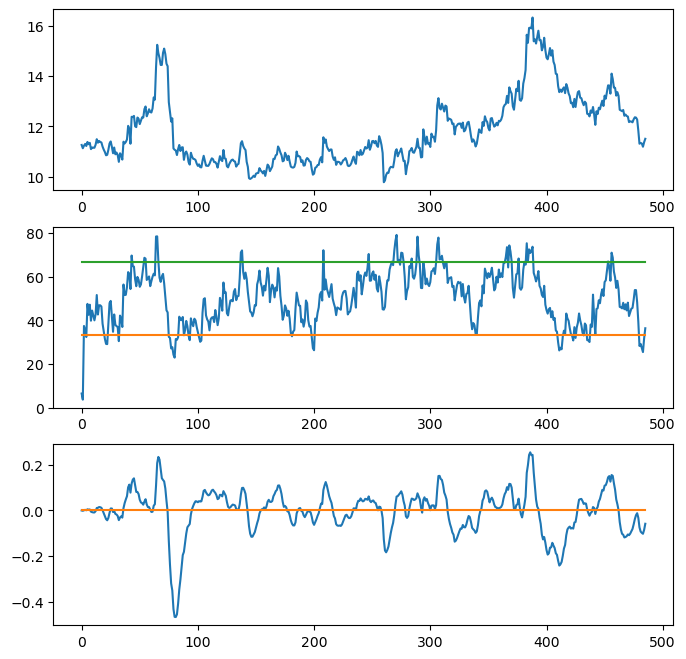

In [86]:
temp = loaddata("r_ti2", 20190101, 20201231)
temp1 = loaddata("mid_close", 20190101, 20201231)
test1 = temp1.iloc[2].dropna().ewm(span=12, ignore_na=True).mean()
test2 = temp1.iloc[2].dropna().ewm(span=26, ignore_na=True).mean()
macd = test1 - test2
signal = macd.ewm(span=9, ignore_na=True).mean()
xzero = [0 for i in range(len(macd))]
rsi = RSI(temp.iloc[2], 12)

fig, ax = plt.subplots(3, figsize = (8, 8))
ax[0].plot(np.array(temp1.iloc[2].dropna()))
ax[1].plot(rsi)
ax[1].plot([33.3 for i in range(len(rsi))])
ax[1].plot([66.6 for i in range(len(rsi))])
ax[2].plot(np.array(MACD(temp1.iloc[2],26,12,9)), label="MACD")
#ax[2].plot(np.array(macd), label="MACD")
#ax[2].plot(np.array(signal), label="Signal")
ax[2].plot(np.array(xzero), label="Zero")
